# 5 likelihood ratio test of GLM and asymmetry of the test

## 5.4.1 parametric bootstrap method

In [17]:
d <- read.csv("data/glm-book/data3a.csv")

In [25]:
fit2 <- glm(y ~ x, data = d, family = poisson)

In [26]:
fit2$deviance

[1] 84.993

In [27]:
fit1 <- glm(y ~ 1, data = d, family = poisson)

In [28]:
fit1$deviance - fit2$deviance

[1] 4.513941

In [35]:
d$y.rnd <- rpois(100, lambda = mean(d$y))

In [36]:
fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
fit2 <- glm(y.rnd ~ x, data = d, family = poisson)
fit1$deviance - fit2$deviance

[1] 4.55333e-05

In [47]:
get.dd <- function(d) # create data and evaluate \delta d
{
  n.sample <- nrow(d) # the number of data
  y.mean <- mean(d$y) # sample average
  d$y.rnd <- rpois(n.sample, lambda = y.mean)
  fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
  fit2 <- glm(y.rnd ~ x, data = d, family = poisson)
  fit1$deviance - fit2$deviance
}

pb <- function(d, n.bootstrap)
{
  replicate(n.bootstrap, get.dd(d))
}

In [48]:
dd12 <- pb(d, n.bootstrap = 1000)

In [49]:
summary(dd12)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000001 0.105080 0.451401 0.984553 1.254256 9.195100 

In [50]:
pb2 <- function(d, n.bootstrap) {
  n.sample <- nrow(d)
  y.mean <- mean(d$y)
  cat("# ")
  v.d.dev12 <- sapply(
    1:n.bootstrap,
  function(i) {
      cat(".")
      if (i %% 50 == 0) cat("\n# ")
      d$y.rnd <- rpois(n.sample, lambda = y.mean)
      fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
      fit2 <- glm(y.rnd ~ x, data = d, family = poisson)
      fit1$deviance - fit2$deviance
    }
  )
  cat("\n")
  v.d.dev12
}

In [51]:
dd123 <- pb2(d, n.bootstrap = 1000)

# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ..................................................
# ............................................

In [46]:
summary(dd123)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000004 0.119564 0.496146 0.986583 1.312785 8.975946 

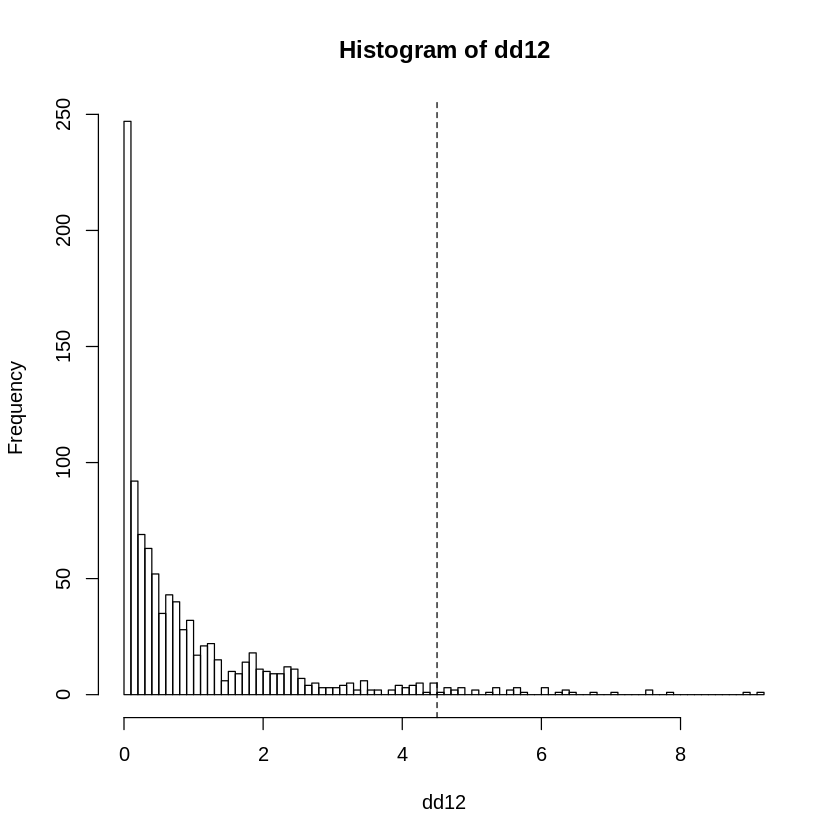

In [54]:
hist(dd12, 100)
abline(v = 4.5, lty = 2)

In [55]:
sum(dd12 >= 4.5)

[1] 35

In [56]:
quantile(dd12, 0.95)

95% 
4.058695

## 5.4.2 approximate calculation method using chi-square distribution

In [57]:
fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
fit2 <- glm(y.rnd ~ x, data = d, family = poisson)

In [58]:
anova(fit1, fit2, test = "Chisq")

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
99,101.8513,NA,NA,NA
98,101.8512,1,4.55333e-05,0.994616
